### Importing all the important libraries

In [1]:
import numpy as np

import tensorflow as tf
import keras

from scipy.io import loadmat #import all the important libraries.
import scipy.io as sio

Using TensorFlow backend.


### Loading Training Data

In [2]:
from scipy.io import loadmat
train_data = sio.loadmat('train_32x32.mat', squeeze_me=True) # loading Training data
train_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Dec  5 21:09:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[[[ 33,  84,  19, ...,  92, 190, 216],
          [ 30,  76,  54, ...,  78, 188, 217],
          [ 38,  59, 110, ..., 101, 191, 212]],
 
         [[ 15,  86,  20, ...,  94, 205, 221],
          [ 23,  73,  52, ...,  82, 203, 222],
          [ 19,  66, 111, ..., 105, 206, 217]],
 
         [[ 15,  77,  25, ..., 114, 220, 226],
          [ 17,  78,  57, ..., 101, 218, 227],
          [ 19,  56, 116, ..., 125, 220, 221]],
 
         ...,
 
         [[ 72,  90,  65, ..., 200, 229, 200],
          [ 65,  78, 144, ..., 201, 231, 199],
          [ 56,  69, 223, ..., 203, 224, 191]],
 
         [[ 82,  88,  78, ..., 192, 229, 193],
          [ 77,  77, 148, ..., 193, 229, 188],
          [ 57,  67, 218, ..., 195, 224, 182]],
 
         [[ 89,  88,  98, ..., 190, 229, 197],
          [ 79,  78, 158, ..., 191, 228, 189],
          [ 59,  66, 220, 

In [3]:
train_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

#### Loading Testing Data

In [4]:
from scipy.io import loadmat
test_data= sio.loadmat('test_32x32.mat', squeeze_me=True) #loading testing data
test_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Dec  5 21:18:15 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[[[ 38, 129, 150, ..., 115,  96, 101],
          [103, 142, 160, ..., 132,  65,  75],
          [ 60, 153, 169, ..., 142,  47,  60]],
 
         [[ 39, 127, 150, ..., 116,  97, 100],
          [104, 143, 163, ..., 133,  65,  73],
          [ 61, 152, 170, ..., 143,  49,  60]],
 
         [[ 39, 125, 152, ..., 117,  97,  99],
          [104, 143, 168, ..., 134,  65,  71],
          [ 62, 151, 172, ..., 144,  50,  59]],
 
         ...,
 
         [[ 41, 121, 153, ..., 114,  86,  95],
          [102, 133, 172, ..., 136,  61,  63],
          [ 61, 153, 180, ..., 141,  54,  52]],
 
         [[ 42, 123, 150, ..., 114,  87,  95],
          [103, 134, 171, ..., 136,  62,  63],
          [ 62, 156, 181, ..., 142,  55,  52]],
 
         [[ 39, 123, 147, ..., 115,  88,  96],
          [ 97, 135, 169, ..., 136,  63,  64],
          [ 57, 157, 180, 

In [5]:
test_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
train_images = np.array(train_data['X'])
test_images = np.array(test_data['X'])

train_labels = train_data['y']
test_labels = test_data['y']

#### # Check the shape of the data

In [7]:

print(train_images.shape)
print(test_images.shape)

(32, 32, 3, 73257)
(32, 32, 3, 26032)


#### Fix the axes of the images

In [8]:
train_images = np.moveaxis(train_images, -1, 0)  # Fix the axes of the images
test_images = np.moveaxis(test_images, -1, 0)

print(train_images.shape)
print(test_images.shape)

(73257, 32, 32, 3)
(26032, 32, 32, 3)


In [9]:
print( 'Train data:', train_images.shape,', Train labels:', train_labels.shape )
print( 'Test data:', test_images.shape,', Test labels:', test_labels.shape )   

Train data: (73257, 32, 32, 3) , Train labels: (73257,)
Test data: (26032, 32, 32, 3) , Test labels: (26032,)


#### Plot a random image and its label

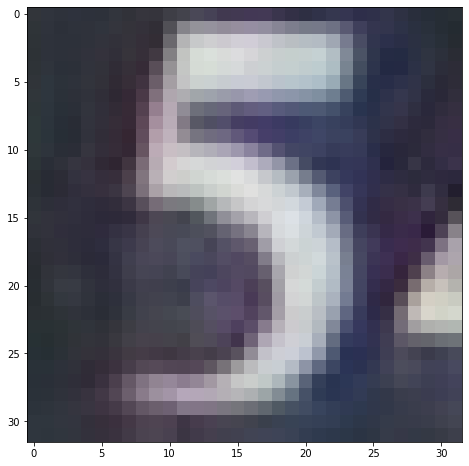

Label:  5


In [10]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))
plt.imshow(train_images[13530])
plt.show()

print('Label: ', train_labels[13530]) #Plot a random image and its label

#### Display 

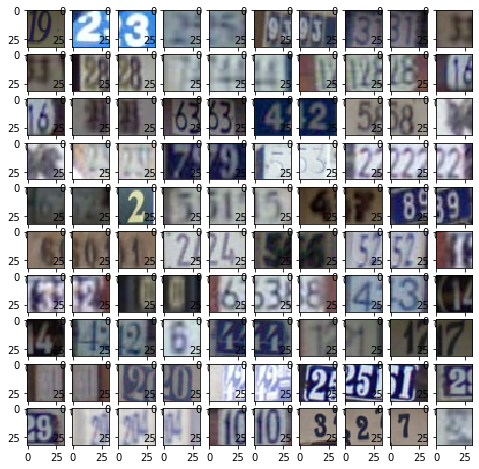

In [11]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8,8))
columns=10
rows= 10
for i in range(1,columns*rows+1):
    img = train_images[i]
    fig.add_subplot(rows,columns,i)
    plt.imshow(img,cmap='gray')
plt.show()

#### Ploting of Training and Testing Labels

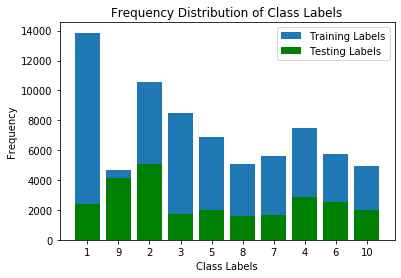

In [12]:
from collections import Counter
temp_labels = train_labels.reshape(73257).tolist()
temp_labels = dict(Counter(temp_labels))
plt.bar(range(len(temp_labels)), temp_labels.values(), align='center', label='Training Labels')
plt.xticks(range(len(temp_labels)), temp_labels.keys())
temp_labels = test_labels.reshape(26032).tolist()
temp_labels = dict(Counter(temp_labels))
plt.bar(range(len(temp_labels)), temp_labels.values(), align='center', color='green', label='Testing Labels')
plt.legend()
plt.xlabel('Class Labels')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Class Labels')
plt.show()

#### Convert train and test images into 'float64' type

In [13]:
train_images = train_images.astype('float64')
test_images = test_images.astype('float64')

#### Convert train and test labels into 'int64' type

In [14]:
train_labels = train_labels.astype('int64')
test_labels = test_labels.astype('int64')

#### Normalize the images data

In [15]:
print('Train', train_images.min(), train_images.max(), train_images.mean(), train_images.std())
print('Test', test_images.min(), test_images.max(), test_images.mean(), test_images.std())    


Train 0.0 255.0 115.11177966923525 50.81926790623289
Test 0.0 255.0 116.78117117073857 57.37636659640377


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator

In [17]:
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

#### Split train data into train and validation sets

In [18]:
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels,
                                                  test_size=0.15, random_state=22) 


In [19]:
y_val.shape

(10989, 10)

In [20]:
X_val.shape

(10989, 32, 32, 3)

#### Data augmentation

In [21]:

datagen = ImageDataGenerator(rotation_range=8,zoom_range=[0.95, 1.05],height_shift_range=0.10,shear_range=0.15)


#### The CNN model with Adam optimizer

In [22]:

keras.backend.clear_session()

aux_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', 
                           activation='relu',
                           input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), padding='same', 
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(64, (3, 3), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(128, (3, 3), padding='same', 
                           activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), padding='same',
                        activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),    
    keras.layers.Dense(10,  activation='softmax')
])

lr_schedule = keras.callbacks.LearningRateScheduler(
              lambda epoch: 1e-4 * 10**(epoch / 10))
optimizer = keras.optimizers.Adam(lr=1e-4, amsgrad=True)
aux_model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                 metrics=['accuracy'])














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




#####  Fit model in order to determine best learning rate

In [ ]:
history = aux_model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),
                              steps_per_epoch=62268//128, epochs=20, validation_data=(X_val, y_val),
                              callbacks=[lr_schedule])  # Fit model in order to determine best learning rate

#### Test accuracy : 91 %(approx)

In [ ]:
aux_model.summary()

#### Plot Learning Rate vs. Loss

In [ ]:
import matplotlib.pyplot as plt
plt.semilogx(history.history['lr'], history.history['loss'])
plt.axis([1e-4, 1e-1, 0, 4])
plt.xlabel('Learning Rate')
plt.ylabel('Training Loss')
plt.show()

#### A rapid drop followed by a relatively flat line. Thus, it is better to choose a learning rate in the region where the loss is stable; a reasonable choice would be lr = 0.01 (or 1e-3).

#### Plotting the graph( Training vs validation accuracy)

In [ ]:

%matplotlib inline

accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


#### These plots look good: The training curves are closely tracking the validation curves.